In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
from src.filters import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import os
import copy

In [2]:
with open('/home/diya/Documents/rat-fes/data/pickles/3-meepo_regular_923__session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/3-results-injured-meepolemons1004_meepo_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/meepo_10-10_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3 = pickle.load(inp)

# linear decoding of forelimb angle in intact rat (9/23)

[0.15  0.397 0.074 0.427 0.34  0.107 0.347]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
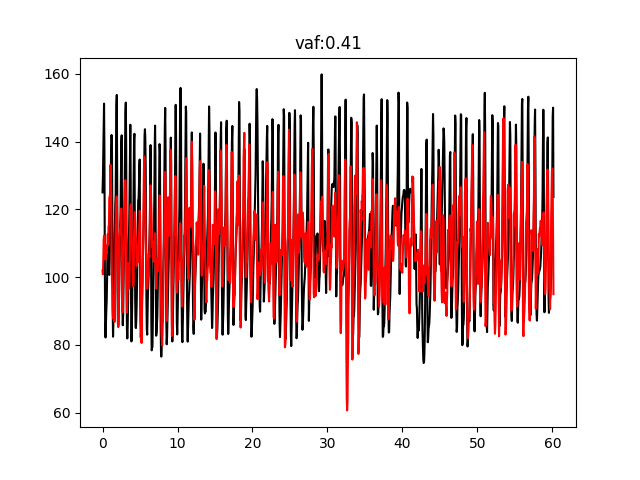

In [4]:
cp1_h_forelimb, cp1_vaf_forelimb, cp1_testx_forelimb, cp1_testy_forelimb = cp1.decode_angles()
plot_wiener_filter_predic(cp1_testx_forelimb, cp1_testy_forelimb[:,6], cp1_h_forelimb[:,6])


print(cp1_vaf_forelimb)

0.19


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
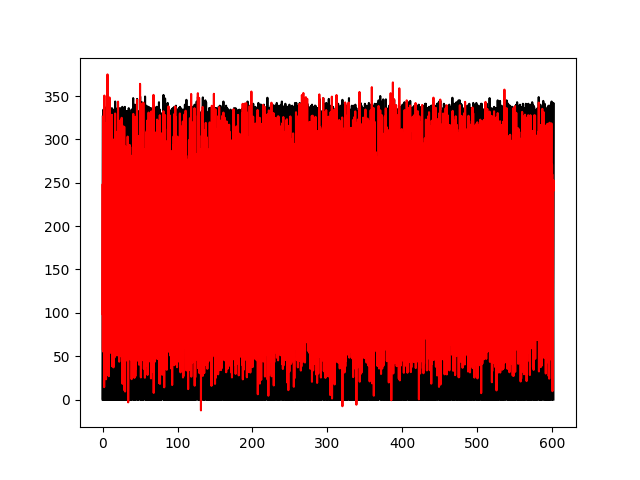

In [20]:
cp1_predic_phases, cp1_actual_phases, _, _, cp1_phase_vaf = cp1.decode_phase(metric_angle='forelimb')
cp1_lowpass_predic_phases = butter_lowpass_filter(cp1_predic_phases, 3, 20)
fig1, ax1 = plt.subplots()
ts = bins_to_seconds(cp1_actual_phases.shape[0])
ax1.plot(ts, cp1_actual_phases[:,6], color='black')
ax1.plot(ts, cp1_lowpass_predic_phases[:,6], color='red')

print(vaf(cp1_actual_phases[:,6], cp1_lowpass_predic_phases[:,6]))

# linear decoding of all SCI data 10/10

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:title={'center':'vaf:0.14'}>)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
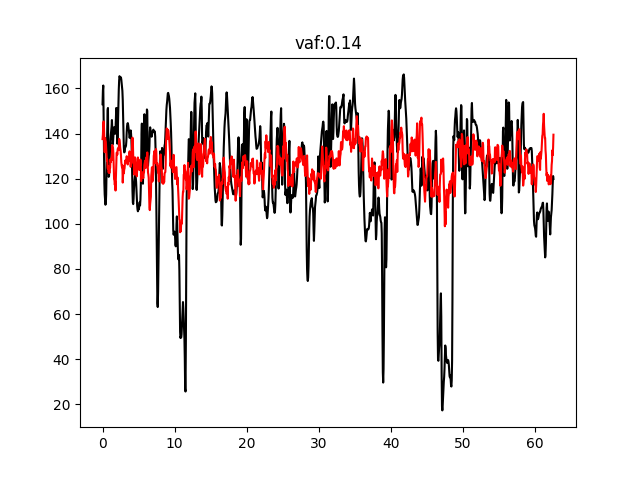

In [23]:
cp3_h_forelimb, cp3_vaf_forelimb, cp3_testx_forelimb, cp3_testy_forelimb = cp3.decode_angles(metric_angle='limbfoot')
plot_wiener_filter_predic(cp3_testx_forelimb, cp3_testy_forelimb[:,6], cp3_h_forelimb[:,6])

# phase decoding with all data

0.03644211039867912


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
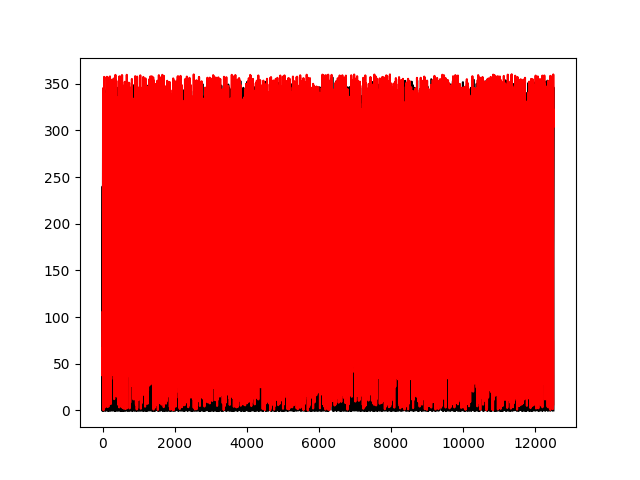

In [90]:
cp3_predic_phase, cp3_actual_phase, _,_, cp3_r2 = cp3.decode_phase()
fig1, ax1 = plt.subplots()
ax1.plot(cp3_actual_phase[:,6], color='black')
ax1.plot(cp3_predic_phase[:,6], color='red')
print(cp3_r2[6])

# lets remove bad gaits

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
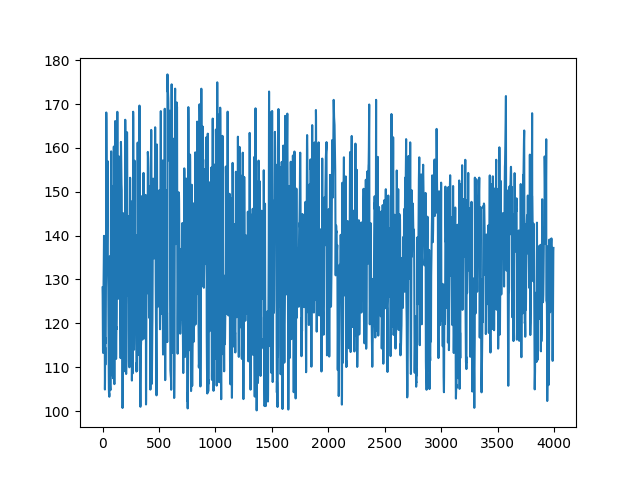

In [26]:
_,_=cp3.get_gait_indices(metric_angle='forelimb')
cp3_procx, cp3_procy = cp3.remove_bad_gaits(bool_resample=False)
fig, ax = plt.subplots()
ax.plot(cp3_procy[:,6])

[-0.055 -0.117 -0.075 -0.101 -0.096 -0.139 -0.092]


/home/diya/Documents/rat-fes/src/plotter.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
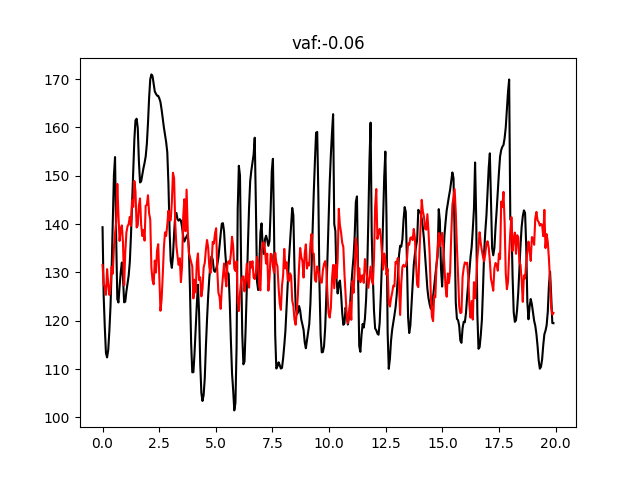

In [29]:
cp3_proc_h_forelimb, cp3_proc_vaf_forelimb, cp3_proc_testx_forelimb, cp3_proc_testy_forelimb = cp3.decode_angles(X=[cp3_procx], Y=[cp3_procy], metric_angle='forelimb')
plot_wiener_filter_predic(cp3_proc_testx_forelimb, cp3_proc_testy_forelimb[:,6], cp3_proc_h_forelimb[:,6])

print(cp3_proc_vaf_forelimb)

# decode 10/10 phase with clean data

In [30]:
cp3_proc_predic_phase, cp3_proc_actual_phase, _,_, cp3_proc_r2 = cp3.decode_phase(rates=[cp3_procx], angles=[cp3_procy], metric_angle='forelimb')

(array([-0.108, -0.087, -0.092, -0.124, -0.093, -0.094, -0.081]), array([-0.091, -0.058, -0.091, -0.136, -0.098, -0.095, -0.095]))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
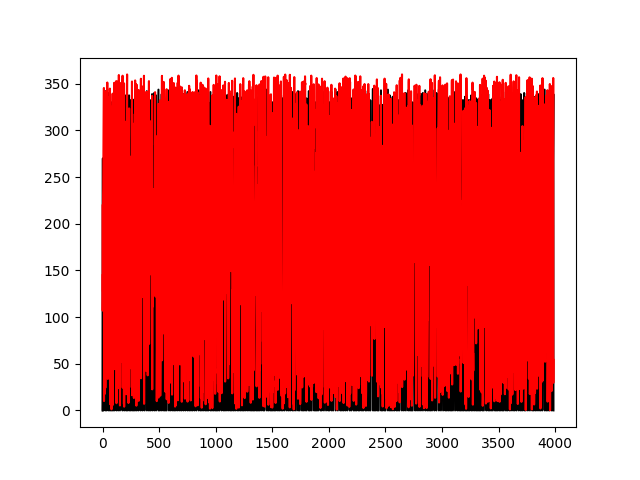

In [35]:
fig1, ax1 = plt.subplots()
ax1.plot(cp3_proc_actual_phase[:,6], color='black')
ax1.plot(cp3_proc_predic_phase[:,6], color='red')
print(cp3_proc_r2)

In [36]:
cp1cp3 = CCAProcessor(cp1, cp3, metric_angle='forelimb', align=0)

should be good to align
(2110, 32)
(2110, 7)
(2110, 32)
(2110, 7)


In [37]:
cp3_pprocx = cp1cp3.data['cp2']['proc_x']
cp3_pprocy = cp1cp3.data['cp2']['proc_y']

[-0.29  -0.318 -0.266 -0.334 -0.135 -0.336 -0.154]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
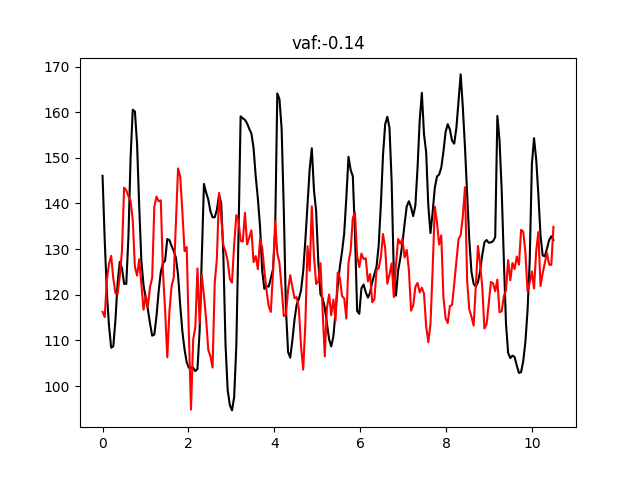

In [53]:
cp3_pproc_h_forelimb, cp3_pproc_vaf_forelimb, cp3_pproc_testx_forelimb, cp3_pproc_testy_forelimb = cp3.decode_angles(X=[cp3_pprocx], Y=[cp3_pprocy], metric_angle='forelimb')
plot_wiener_filter_predic(cp3_pproc_testx_forelimb, cp3_pproc_testy_forelimb[:,6], cp3_pproc_h_forelimb[:,6])
print(cp3_pproc_vaf_forelimb)

(array([-0.17663338, -0.25113548, -0.2308928 , -0.21875823, -0.10755767,
       -0.20241271, -0.11313085]), array([-0.21545138, -0.19801011, -0.24501023, -0.17922182, -0.11836237,
       -0.20221329, -0.13123343]))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
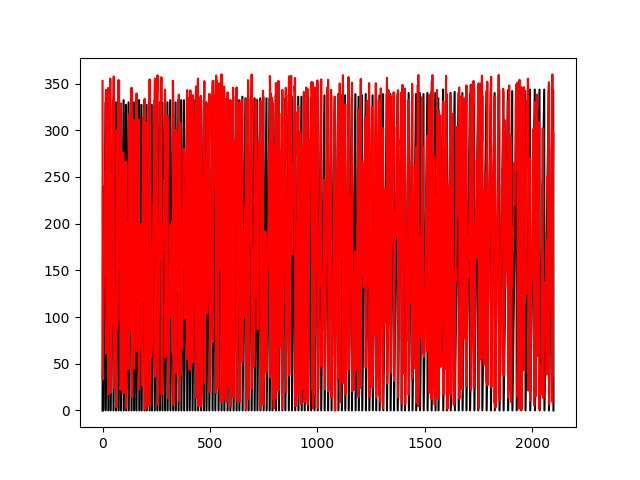

In [52]:
cp3_pproc_predic_phase, cp3_pproc_actual_phase, _,_, cp3_pproc_r2 = cp3.decode_phase(rates=[cp3_pprocx], angles=[cp3_pprocy], metric_angle='forelimb')
cp3_lowpass_pproc_predic_phase = butter_lowpass_filter(cp3_pproc_predic_phase, 3.5, 20)
fig1, ax1 = plt.subplots()
ax1.plot(cp3_pproc_actual_phase[:,6], color='black')
ax1.plot(cp3_pproc_predic_phase[:,6], color='red')
print(cp3_pproc_r2)

# lets try on 10/04 data too

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
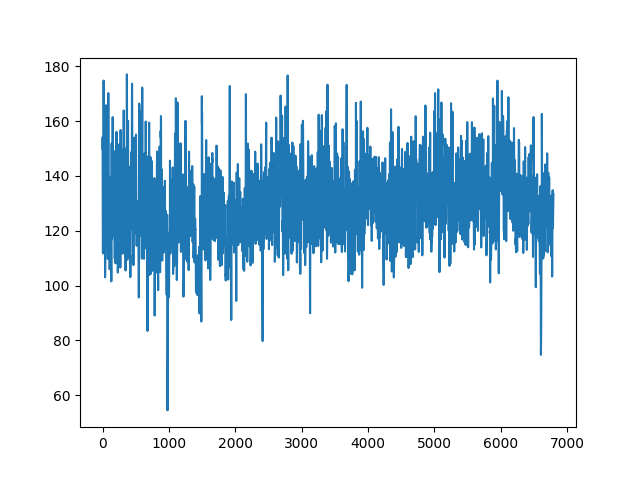

In [72]:
_,_=cp2.get_gait_indices(metric_angle='forelimb')
cp2_procx, cp2_procy = cp2.remove_bad_gaits(bool_resample=False)
fig, ax = plt.subplots()
ax.plot(cp2_procy[:,6])

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:title={'center':'vaf:-0.07'}>)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
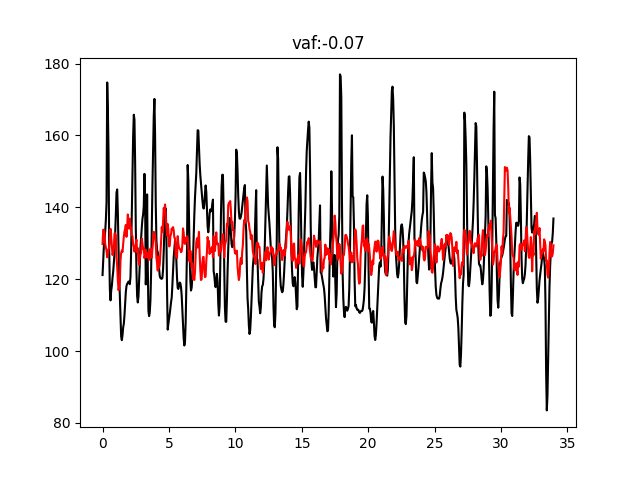

In [73]:
h_proc1_forelimb, vaf_proc1_forelimb, testx_proc1_forelimb, testy_proc1_forelimb = cp2.decode_angles(X=[cp2_procx], Y=[cp2_procy])
plot_wiener_filter_predic(testx_proc1_forelimb, testy_proc1_forelimb[:,6], h_proc1_forelimb[:,6])

0.08827822787638895


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
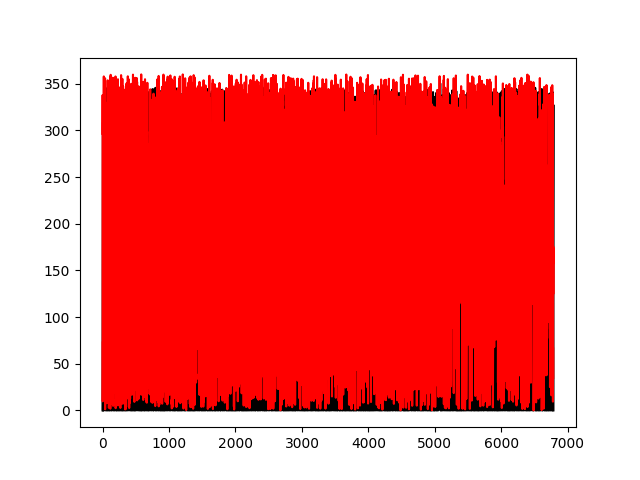

In [103]:
cp2_proc_predic_phase, cp2_proc_actual_phase, _,_, cp2_proc_r2 = cp2.decode_phase(rates=[cp2_procx], angles=[cp2_procy])
fig1, ax1 = plt.subplots()
ax1.plot(cp2_proc_actual_phase[:,6], color='black')
ax1.plot(cp2_proc_predic_phase[:,6], color='red')
print(cp2_proc_r2[6])